This notebook runs a pipeline with the following steps:
* Create a test Visibility dataset.
   * No visibility sample noise. Just testing that things are working exactly as expected.
   * Using the GLEAM sky model with station-dependent Faraday rotation and everybeam station beam models.
   * Add complex Gaussian noise corruptions to station gains and leakage.
   * Write to disk in MSv2 format.
* Read MSv2 data into Visibility dataset.$^{*}$
* Predict model visibilities (using GLEAM and everybeam).$^{*}$
* Do polarised bandpass calibration.$^{*}$
* Fit for the  $\lambda^{2}$-dependent rotation of each station.
* Redo predict with RM estimates.$^{*}$
* Redo polarised bandpass calibration.$^{*}$
* Check for convergence.

\* xarray dataset map_blocks() is used to distribute frequency sub-bands across dask tasks.

In [1]:
from time import perf_counter

from IPython.display import Image

from ska_sdp_instrumental_calibration.workflow.pipelines import (
    bandpass_polarisation,
)

<frozen abc>:106: FutureWarning: xarray subclass Visibility should explicitly define __slots__


In [2]:
ddir = "/data/EOS_1/mit183"
t0 = perf_counter()
bandpass_polarisation.run(
    {
        # Required external data
        "gleamfile": f"{ddir}/gleamegc.dat",
        "eb_ms": f"{ddir}/SKA/SP-4626/OSKAR_MOCK.ms",
        "eb_coeffs": f"{ddir}/SKA/SP-4626/ska-sdp-func-everybeam/coeffs",
        # Other parameters
        "ms_name": "demo.ms",
        "h5parm_name": "demo.h5",
        "delays": False,
        "gains": True,
        "leakage": True,
        "rotation": True,
        "wide_channels": True,
        "normalise_at_beam_centre": True,
    }
)
print(f"pipeline ran in {perf_counter() - t0:.1f} seconds")

2025-05-16 17:03:30,044 - workflow.pipeline_config - INFO - Simulating demo MSv2 input


1|2025-05-16T07:03:30.044Z|INFO|MainThread|__init__|pipeline_config.py#137||Simulating demo MSv2 input


2025-05-16 17:03:30,047 - workflow.pipeline_config - INFO - Initialising the EveryBeam telescope model with /data/EOS_1/mit183/SKA/SP-4626/OSKAR_MOCK.ms


1|2025-05-16T07:03:30.047Z|INFO|MainThread|__init__|pipeline_config.py#194||Initialising the EveryBeam telescope model with /data/EOS_1/mit183/SKA/SP-4626/OSKAR_MOCK.ms


2025-05-16 17:03:30,049 - workflow.pipeline_config - INFO - Generating a demo MSv2 Measurement Set demo.ms


1|2025-05-16T07:03:30.049Z|INFO|MainThread|simulate_input_dataset|pipeline_config.py#210||Generating a demo MSv2 Measurement Set demo.ms


2025-05-16 17:03:30,052 - workflow.pipeline_config - INFO - Generating LSM for simulation with:


1|2025-05-16T07:03:30.052Z|INFO|MainThread|simulate_input_dataset|pipeline_config.py#217||Generating LSM for simulation with:


2025-05-16 17:03:30,054 - workflow.pipeline_config - INFO -  - Search radius: 5.0 deg


1|2025-05-16T07:03:30.054Z|INFO|MainThread|simulate_input_dataset|pipeline_config.py#218|| - Search radius: 5.0 deg


2025-05-16 17:03:30,056 - workflow.pipeline_config - INFO -  - Flux limit: 1 Jy


1|2025-05-16T07:03:30.056Z|INFO|MainThread|simulate_input_dataset|pipeline_config.py#219|| - Flux limit: 1 Jy


2025-05-16 17:03:30,058 - workflow.pipeline_config - INFO -  - GLEAMEGC file: /data/EOS_1/mit183/gleamegc.dat


1|2025-05-16T07:03:30.058Z|INFO|MainThread|simulate_input_dataset|pipeline_config.py#221|| - GLEAMEGC file: /data/EOS_1/mit183/gleamegc.dat


2025-05-16 17:03:30,659 - processing_tasks.lsm - INFO - extracted 37 GLEAM components


1|2025-05-16T07:03:30.659Z|INFO|MainThread|generate_lsm_from_gleamegc|lsm.py#266||extracted 37 GLEAM components


2025-05-16 17:03:30,661 - workflow.pipeline_config - INFO - LSM contains 37 components


1|2025-05-16T07:03:30.661Z|INFO|MainThread|simulate_input_dataset|pipeline_config.py#240||LSM contains 37 components


2025-05-16 17:03:30,671 - workflow.utils - INFO - Using AA1-Low with 20 stations


1|2025-05-16T07:03:30.671Z|INFO|MainThread|create_demo_ms|utils.py#169||Using AA1-Low with 20 stations


2025-05-16 17:03:31,264 - workflow.utils - INFO - Applying DI lambda^2-dependent rotations during predict


1|2025-05-16T07:03:31.264Z|INFO|MainThread|create_demo_ms|utils.py#202||Applying DI lambda^2-dependent rotations during predict


2025-05-16 17:03:31,266 - processing_tasks.predict - INFO - Using EveryBeam model in predict


1|2025-05-16T07:03:31.266Z|INFO|MainThread|predict_from_components|predict.py#168||Using EveryBeam model in predict
1|2025-05-16T07:03:31.271Z|INFO|MainThread|__init__|beams.py#86||Initialising beams for Low
1|2025-05-16T07:03:31.337Z|INFO|MainThread|__init__|beams.py#95||Setting beam normalisation for OSKAR data


2025-05-16 17:03:33,232 - workflow.utils - INFO - Applying direction-independent gain corruptions


1|2025-05-16T07:03:33.232Z|INFO|MainThread|create_demo_ms|utils.py#225||Applying direction-independent gain corruptions


2025-05-16 17:03:33,235 - workflow.utils - INFO - Applying direction-independent leakage corruptions


1|2025-05-16T07:03:33.235Z|INFO|MainThread|create_demo_ms|utils.py#239||Applying direction-independent leakage corruptions
1|2025-05-16T07:03:33.788Z|INFO|MainThread|run|bandpass_polarisation.py#84||Starting pipeline with 16-channel chunks
1|2025-05-16T07:03:33.788Z|INFO|MainThread|run|bandpass_polarisation.py#88||No dask cluster supplied. Using LocalCluster
1|2025-05-16T07:03:35.258Z|INFO|MainThread|run|bandpass_polarisation.py#98||Generating LSM for predict with:
1|2025-05-16T07:03:35.260Z|INFO|MainThread|run|bandpass_polarisation.py#99|| - Search radius: 5.0 deg
1|2025-05-16T07:03:35.261Z|INFO|MainThread|run|bandpass_polarisation.py#100|| - Flux limit: 1 Jy
1|2025-05-16T07:03:35.262Z|INFO|MainThread|run|bandpass_polarisation.py#102|| - GLEAMEGC catalogue file: /data/EOS_1/mit183/gleamegc.dat


2025-05-16 17:03:35,959 - processing_tasks.lsm - INFO - extracted 37 GLEAM components


1|2025-05-16T07:03:35.959Z|INFO|MainThread|generate_lsm_from_gleamegc|lsm.py#266||extracted 37 GLEAM components
1|2025-05-16T07:03:35.961Z|INFO|MainThread|run|bandpass_polarisation.py#119||LSM contains 37 components
1|2025-05-16T07:03:35.961Z|WARNING|MainThread|run|bandpass_polarisation.py#122||Not running end-to-end version.
1|2025-05-16T07:03:35.961Z|INFO|MainThread|run|bandpass_polarisation.py#130||Will ingest demo.ms in 16-channel chunks
1|2025-05-16T07:03:35.965Z|INFO|MainThread|create_visibility_from_ms|vis_io_ms.py#339||Reading uni. fields [0], uni. data descs [0]
1|2025-05-16T07:03:36.079Z|INFO|MainThread|run|bandpass_polarisation.py#162||Setting vis predict in 16-channel chunks
1|2025-05-16T07:03:36.337Z|INFO|MainThread|run|bandpass_polarisation.py#184||Setting calibration in 16-channel chunks
1|2025-05-16T07:03:36.338Z|INFO|MainThread|run|bandpass_polarisation.py#185|| - Using solver jones_substitution
1|2025-05-16T07:03:36.340Z|INFO|MainThread|run|bandpass_polarisation.py#18

2025-05-16 17:03:38,996 - processing_tasks.predict - INFO - Using EveryBeam model in predict
2025-05-16 17:03:39,028 - processing_tasks.predict - INFO - Using EveryBeam model in predict
2025-05-16 17:03:39,299 - processing_tasks.predict - INFO - Using EveryBeam model in predict
2025-05-16 17:03:39,323 - processing_tasks.predict - INFO - Using EveryBeam model in predict
2025-05-16 17:03:39,342 - processing_tasks.predict - INFO - Using EveryBeam model in predict
2025-05-16 17:03:39,472 - processing_tasks.predict - INFO - Using EveryBeam model in predict
2025-05-16 17:03:40,167 - processing_tasks.predict - INFO - Using EveryBeam model in predict
2025-05-16 17:03:40,186 - processing_tasks.predict - INFO - Using EveryBeam model in predict


1|2025-05-16T07:03:43.553Z|INFO|MainThread|run|bandpass_polarisation.py#202||Fitting differential rotations
1|2025-05-16T07:03:44.537Z|INFO|MainThread|run|bandpass_polarisation.py#207||Re-predicting model vis with RM estimates
1|2025-05-16T07:03:44.602Z|INFO|MainThread|run|bandpass_polarisation.py#221||Resetting calibration in 16-channel chunks
1|2025-05-16T07:03:44.603Z|INFO|MainThread|run|bandpass_polarisation.py#222|| - First using solver jones_substitution again
1|2025-05-16T07:03:44.688Z|INFO|MainThread|run|bandpass_polarisation.py#231|| - Then improving using solver normal_equations
1|2025-05-16T07:03:44.736Z|INFO|MainThread|run|bandpass_polarisation.py#242||Running graph and returning calibration solutions


2025-05-16 17:03:45,092 - processing_tasks.predict - INFO - Using EveryBeam model in predict
2025-05-16 17:03:45,196 - processing_tasks.predict - INFO - Using EveryBeam model in predict
2025-05-16 17:03:45,263 - processing_tasks.predict - INFO - Using EveryBeam model in predict
2025-05-16 17:03:45,265 - processing_tasks.predict - INFO - Using EveryBeam model in predict
2025-05-16 17:03:45,468 - processing_tasks.predict - INFO - Using EveryBeam model in predict
2025-05-16 17:03:45,530 - processing_tasks.predict - INFO - Using EveryBeam model in predict
2025-05-16 17:03:45,532 - processing_tasks.predict - INFO - Using EveryBeam model in predict
2025-05-16 17:03:45,554 - processing_tasks.predict - INFO - Using EveryBeam model in predict


1|2025-05-16T07:03:49.616Z|INFO|MainThread|run|bandpass_polarisation.py#302||Writing solutions to demo.h5


2025-05-16 17:03:49,617 - data_managers.data_export - INFO - exporting cal solutions to demo.h5


1|2025-05-16T07:03:49.617Z|INFO|MainThread|export_gaintable_to_h5parm|export_gaintable.py#29||exporting cal solutions to demo.h5


2025-05-16 17:03:49,630 - data_managers.data_export - INFO - output dimensions: {'time': 1, 'ant': 20, 'freq': 64, 'pol': 4}


1|2025-05-16T07:03:49.630Z|INFO|MainThread|export_gaintable_to_h5parm|export_gaintable.py#63||output dimensions: {'time': 1, 'ant': 20, 'freq': 64, 'pol': 4}
1|2025-05-16T07:03:49.640Z|INFO|MainThread|run|bandpass_polarisation.py#313||Checking results


2025-05-16 17:03:49,986 - processing_tasks.predict - INFO - Using EveryBeam model in predict
2025-05-16 17:03:50,053 - processing_tasks.predict - INFO - Using EveryBeam model in predict
2025-05-16 17:03:50,129 - processing_tasks.predict - INFO - Using EveryBeam model in predict
2025-05-16 17:03:50,132 - processing_tasks.predict - INFO - Using EveryBeam model in predict
2025-05-16 17:03:50,642 - processing_tasks.predict - INFO - Using EveryBeam model in predict
2025-05-16 17:03:50,719 - processing_tasks.predict - INFO - Using EveryBeam model in predict
2025-05-16 17:03:50,749 - processing_tasks.predict - INFO - Using EveryBeam model in predict
2025-05-16 17:03:50,782 - processing_tasks.predict - INFO - Using EveryBeam model in predict
2025-05-16 17:03:50,953 - processing_tasks.predict - INFO - Using EveryBeam model in predict
2025-05-16 17:03:50,955 - processing_tasks.predict - INFO - Using EveryBeam model in predict
2025-05-16 17:03:50,966 - processing_tasks.predict - INFO - Using Ever

1|2025-05-16T07:03:52.146Z|INFO|MainThread|run|bandpass_polarisation.py#318||model max = 11.8
1|2025-05-16T07:03:52.149Z|INFO|MainThread|run|bandpass_polarisation.py#319||corrected max = 11.8
1|2025-05-16T07:03:52.151Z|INFO|MainThread|run|bandpass_polarisation.py#320||diff max = 7.1e-04
1|2025-05-16T07:03:52.152Z|INFO|MainThread|run|bandpass_polarisation.py#321||diff max (relative) = 6.0e-05
1|2025-05-16T07:03:52.154Z|INFO|MainThread|run|bandpass_polarisation.py#326||Convergence checks passed
pipeline ran in 22.6 seconds


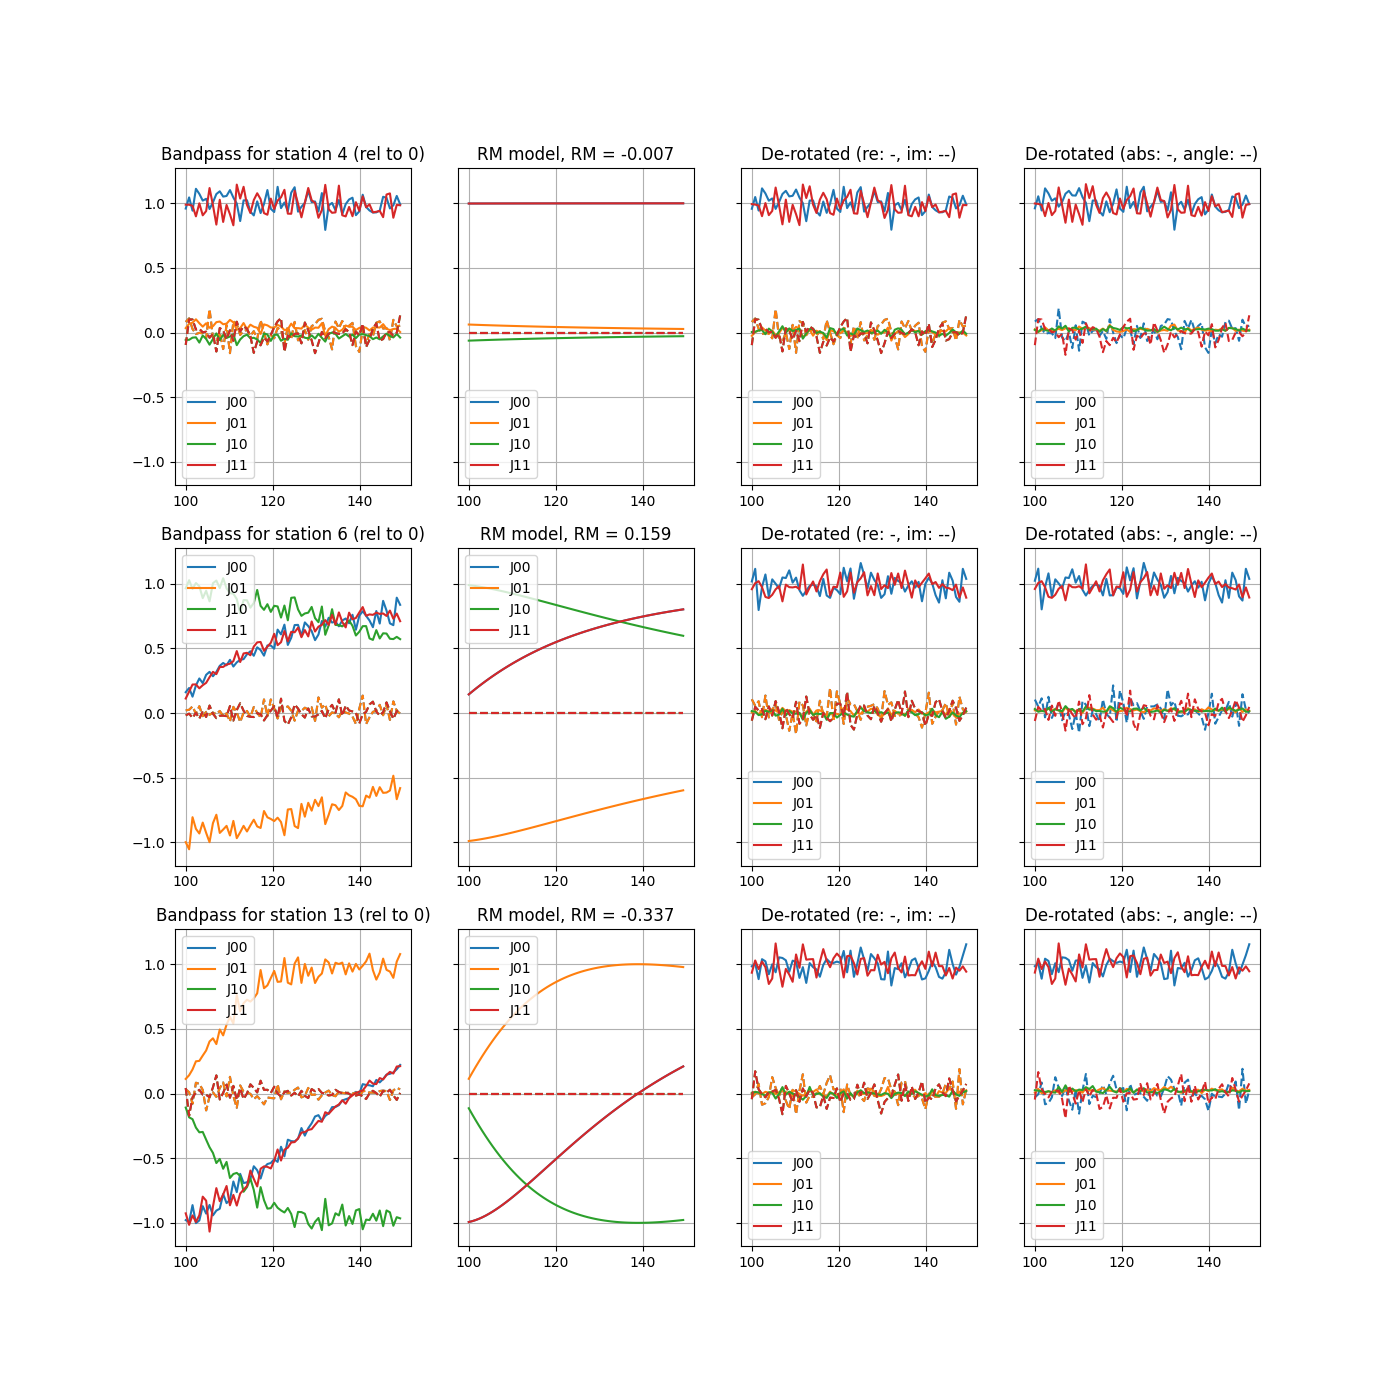

In [3]:
Image(filename="bandpass_stages.png")

In [4]:
ddir = "/data/EOS_1/mit183"
t0 = perf_counter()
bandpass_polarisation.run(
    {
        # Required external data
        "gleamfile": f"{ddir}/gleamegc.dat",
        "eb_ms": f"{ddir}/SKA/SP-4626/OSKAR_MOCK.ms",
        "eb_coeffs": f"{ddir}/SKA/SP-4626/ska-sdp-func-everybeam/coeffs",
        # Other parameters
        "ms_name": "demo.ms",
        "h5parm_name": "demo.h5",
        "delays": True,
        "gains": False,
        "leakage": False,
        "rotation": True,
        "wide_channels": True,
        "normalise_at_beam_centre": True,
    }
)
print(f"pipeline ran in {perf_counter() - t0:.1f} seconds")

2025-05-16 17:03:52,685 - workflow.pipeline_config - INFO - Simulating demo MSv2 input


1|2025-05-16T07:03:52.685Z|INFO|MainThread|__init__|pipeline_config.py#137||Simulating demo MSv2 input


2025-05-16 17:03:52,687 - workflow.pipeline_config - INFO - Initialising the EveryBeam telescope model with /data/EOS_1/mit183/SKA/SP-4626/OSKAR_MOCK.ms


1|2025-05-16T07:03:52.687Z|INFO|MainThread|__init__|pipeline_config.py#194||Initialising the EveryBeam telescope model with /data/EOS_1/mit183/SKA/SP-4626/OSKAR_MOCK.ms


2025-05-16 17:03:52,688 - workflow.pipeline_config - INFO - Generating a demo MSv2 Measurement Set demo.ms


1|2025-05-16T07:03:52.688Z|INFO|MainThread|simulate_input_dataset|pipeline_config.py#210||Generating a demo MSv2 Measurement Set demo.ms


2025-05-16 17:03:52,690 - workflow.pipeline_config - INFO - Generating LSM for simulation with:


1|2025-05-16T07:03:52.690Z|INFO|MainThread|simulate_input_dataset|pipeline_config.py#217||Generating LSM for simulation with:


2025-05-16 17:03:52,691 - workflow.pipeline_config - INFO -  - Search radius: 5.0 deg


1|2025-05-16T07:03:52.691Z|INFO|MainThread|simulate_input_dataset|pipeline_config.py#218|| - Search radius: 5.0 deg


2025-05-16 17:03:52,692 - workflow.pipeline_config - INFO -  - Flux limit: 1 Jy


1|2025-05-16T07:03:52.692Z|INFO|MainThread|simulate_input_dataset|pipeline_config.py#219|| - Flux limit: 1 Jy


2025-05-16 17:03:52,693 - workflow.pipeline_config - INFO -  - GLEAMEGC file: /data/EOS_1/mit183/gleamegc.dat


1|2025-05-16T07:03:52.693Z|INFO|MainThread|simulate_input_dataset|pipeline_config.py#221|| - GLEAMEGC file: /data/EOS_1/mit183/gleamegc.dat


2025-05-16 17:03:53,282 - processing_tasks.lsm - INFO - extracted 37 GLEAM components


1|2025-05-16T07:03:53.282Z|INFO|MainThread|generate_lsm_from_gleamegc|lsm.py#266||extracted 37 GLEAM components


2025-05-16 17:03:53,283 - workflow.pipeline_config - INFO - LSM contains 37 components


1|2025-05-16T07:03:53.283Z|INFO|MainThread|simulate_input_dataset|pipeline_config.py#240||LSM contains 37 components


2025-05-16 17:03:53,307 - workflow.utils - INFO - Using AA1-Low with 20 stations


1|2025-05-16T07:03:53.307Z|INFO|MainThread|create_demo_ms|utils.py#169||Using AA1-Low with 20 stations


2025-05-16 17:03:53,350 - workflow.utils - INFO - Applying DI lambda^2-dependent rotations during predict


1|2025-05-16T07:03:53.350Z|INFO|MainThread|create_demo_ms|utils.py#202||Applying DI lambda^2-dependent rotations during predict


2025-05-16 17:03:53,353 - processing_tasks.predict - INFO - Using EveryBeam model in predict


1|2025-05-16T07:03:53.353Z|INFO|MainThread|predict_from_components|predict.py#168||Using EveryBeam model in predict
1|2025-05-16T07:03:53.357Z|INFO|MainThread|__init__|beams.py#86||Initialising beams for Low
1|2025-05-16T07:03:53.374Z|INFO|MainThread|__init__|beams.py#95||Setting beam normalisation for OSKAR data
1|2025-05-16T07:03:55.821Z|INFO|MainThread|run|bandpass_polarisation.py#84||Starting pipeline with 16-channel chunks
1|2025-05-16T07:03:55.822Z|INFO|MainThread|run|bandpass_polarisation.py#88||No dask cluster supplied. Using LocalCluster
1|2025-05-16T07:03:56.684Z|INFO|MainThread|run|bandpass_polarisation.py#98||Generating LSM for predict with:
1|2025-05-16T07:03:56.685Z|INFO|MainThread|run|bandpass_polarisation.py#99|| - Search radius: 5.0 deg
1|2025-05-16T07:03:56.686Z|INFO|MainThread|run|bandpass_polarisation.py#100|| - Flux limit: 1 Jy
1|2025-05-16T07:03:56.686Z|INFO|MainThread|run|bandpass_polarisation.py#102|| - GLEAMEGC catalogue file: /data/EOS_1/mit183/gleamegc.dat


2025-05-16 17:03:57,365 - processing_tasks.lsm - INFO - extracted 37 GLEAM components


1|2025-05-16T07:03:57.365Z|INFO|MainThread|generate_lsm_from_gleamegc|lsm.py#266||extracted 37 GLEAM components
1|2025-05-16T07:03:57.367Z|INFO|MainThread|run|bandpass_polarisation.py#119||LSM contains 37 components
1|2025-05-16T07:03:57.368Z|WARNING|MainThread|run|bandpass_polarisation.py#122||Not running end-to-end version.
1|2025-05-16T07:03:57.368Z|INFO|MainThread|run|bandpass_polarisation.py#130||Will ingest demo.ms in 16-channel chunks
1|2025-05-16T07:03:57.371Z|INFO|MainThread|create_visibility_from_ms|vis_io_ms.py#339||Reading uni. fields [0], uni. data descs [0]
1|2025-05-16T07:03:57.438Z|INFO|MainThread|run|bandpass_polarisation.py#162||Setting vis predict in 16-channel chunks
1|2025-05-16T07:03:57.575Z|INFO|MainThread|run|bandpass_polarisation.py#184||Setting calibration in 16-channel chunks
1|2025-05-16T07:03:57.576Z|INFO|MainThread|run|bandpass_polarisation.py#185|| - Using solver jones_substitution
1|2025-05-16T07:03:57.576Z|INFO|MainThread|run|bandpass_polarisation.py#18

2025-05-16 17:04:00,325 - processing_tasks.predict - INFO - Using EveryBeam model in predict
2025-05-16 17:04:00,367 - processing_tasks.predict - INFO - Using EveryBeam model in predict
2025-05-16 17:04:00,372 - processing_tasks.predict - INFO - Using EveryBeam model in predict
2025-05-16 17:04:00,382 - processing_tasks.predict - INFO - Using EveryBeam model in predict
2025-05-16 17:04:00,398 - processing_tasks.predict - INFO - Using EveryBeam model in predict
2025-05-16 17:04:00,610 - processing_tasks.predict - INFO - Using EveryBeam model in predict
2025-05-16 17:04:02,172 - processing_tasks.predict - INFO - Using EveryBeam model in predict
2025-05-16 17:04:02,284 - processing_tasks.predict - INFO - Using EveryBeam model in predict


1|2025-05-16T07:04:04.775Z|INFO|MainThread|run|bandpass_polarisation.py#202||Fitting differential rotations
1|2025-05-16T07:04:05.629Z|INFO|MainThread|run|bandpass_polarisation.py#207||Re-predicting model vis with RM estimates
1|2025-05-16T07:04:05.711Z|INFO|MainThread|run|bandpass_polarisation.py#221||Resetting calibration in 16-channel chunks
1|2025-05-16T07:04:05.711Z|INFO|MainThread|run|bandpass_polarisation.py#222|| - First using solver jones_substitution again
1|2025-05-16T07:04:05.772Z|INFO|MainThread|run|bandpass_polarisation.py#231|| - Then improving using solver normal_equations
1|2025-05-16T07:04:05.820Z|INFO|MainThread|run|bandpass_polarisation.py#242||Running graph and returning calibration solutions


2025-05-16 17:04:06,165 - processing_tasks.predict - INFO - Using EveryBeam model in predict
2025-05-16 17:04:06,241 - processing_tasks.predict - INFO - Using EveryBeam model in predict
2025-05-16 17:04:06,261 - processing_tasks.predict - INFO - Using EveryBeam model in predict
2025-05-16 17:04:06,276 - processing_tasks.predict - INFO - Using EveryBeam model in predict
2025-05-16 17:04:06,494 - processing_tasks.predict - INFO - Using EveryBeam model in predict
2025-05-16 17:04:06,497 - processing_tasks.predict - INFO - Using EveryBeam model in predict
2025-05-16 17:04:06,566 - processing_tasks.predict - INFO - Using EveryBeam model in predict
2025-05-16 17:04:06,574 - processing_tasks.predict - INFO - Using EveryBeam model in predict


1|2025-05-16T07:04:10.801Z|INFO|MainThread|run|bandpass_polarisation.py#302||Writing solutions to demo.h5


2025-05-16 17:04:10,802 - data_managers.data_export - INFO - exporting cal solutions to demo.h5


1|2025-05-16T07:04:10.802Z|INFO|MainThread|export_gaintable_to_h5parm|export_gaintable.py#29||exporting cal solutions to demo.h5


2025-05-16 17:04:10,815 - data_managers.data_export - INFO - output dimensions: {'time': 1, 'ant': 20, 'freq': 64, 'pol': 4}


1|2025-05-16T07:04:10.815Z|INFO|MainThread|export_gaintable_to_h5parm|export_gaintable.py#63||output dimensions: {'time': 1, 'ant': 20, 'freq': 64, 'pol': 4}
1|2025-05-16T07:04:10.822Z|INFO|MainThread|run|bandpass_polarisation.py#313||Checking results


2025-05-16 17:04:11,164 - processing_tasks.predict - INFO - Using EveryBeam model in predict
2025-05-16 17:04:11,175 - processing_tasks.predict - INFO - Using EveryBeam model in predict
2025-05-16 17:04:11,265 - processing_tasks.predict - INFO - Using EveryBeam model in predict
2025-05-16 17:04:11,347 - processing_tasks.predict - INFO - Using EveryBeam model in predict
2025-05-16 17:04:11,849 - processing_tasks.predict - INFO - Using EveryBeam model in predict
2025-05-16 17:04:11,856 - processing_tasks.predict - INFO - Using EveryBeam model in predict
2025-05-16 17:04:11,940 - processing_tasks.predict - INFO - Using EveryBeam model in predict
2025-05-16 17:04:11,941 - processing_tasks.predict - INFO - Using EveryBeam model in predict
2025-05-16 17:04:12,143 - processing_tasks.predict - INFO - Using EveryBeam model in predict
2025-05-16 17:04:12,147 - processing_tasks.predict - INFO - Using EveryBeam model in predict
2025-05-16 17:04:12,162 - processing_tasks.predict - INFO - Using Ever

1|2025-05-16T07:04:13.298Z|INFO|MainThread|run|bandpass_polarisation.py#318||model max = 11.8
1|2025-05-16T07:04:13.300Z|INFO|MainThread|run|bandpass_polarisation.py#319||corrected max = 11.8
1|2025-05-16T07:04:13.301Z|INFO|MainThread|run|bandpass_polarisation.py#320||diff max = 1.7e-05
1|2025-05-16T07:04:13.302Z|INFO|MainThread|run|bandpass_polarisation.py#321||diff max (relative) = 1.4e-06
1|2025-05-16T07:04:13.303Z|INFO|MainThread|run|bandpass_polarisation.py#326||Convergence checks passed
pipeline ran in 21.1 seconds


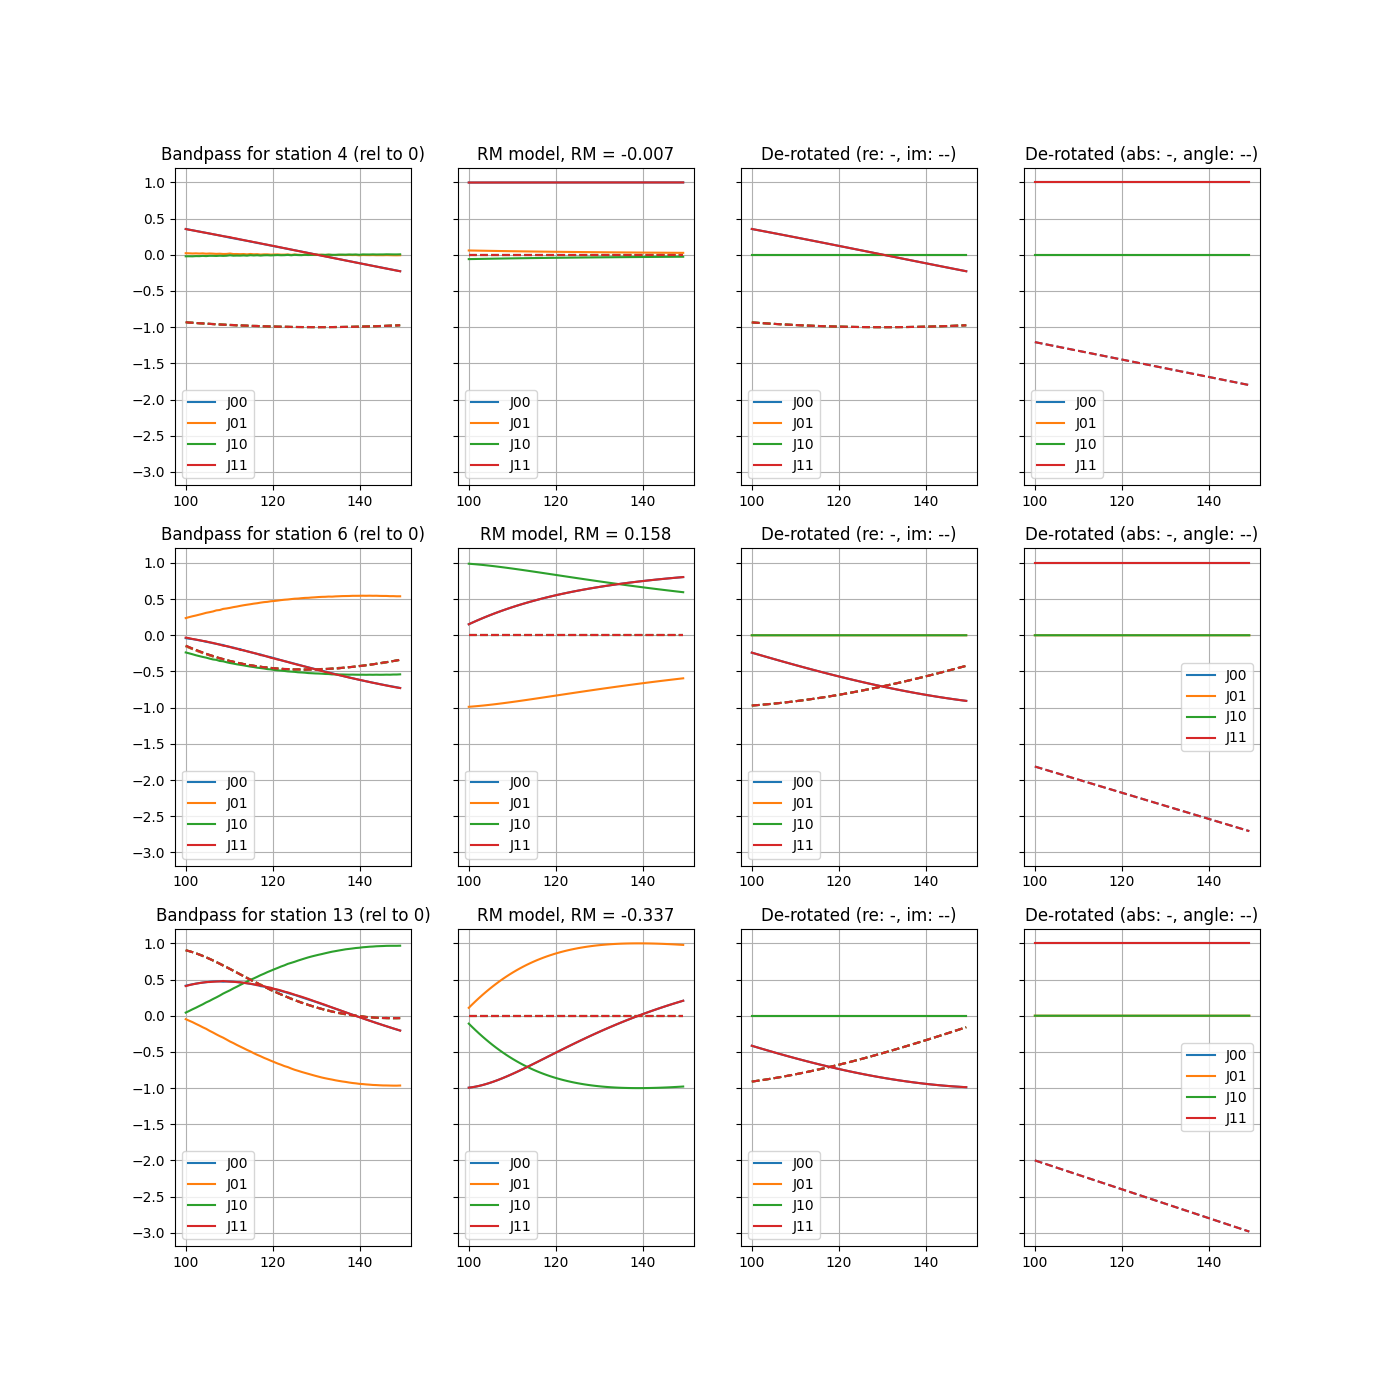

In [5]:
Image(filename="bandpass_stages.png")